In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from scipy.stats import zscore

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
from sklearn import tree
from os import system

In [4]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
df = pd.read_csv("pima-indians-diabetes-1.data",names=colnames)
df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
x= df.drop('outcome', axis=1)
y= df.outcome
x_std= StandardScaler().fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y, test_size = 0.3, random_state=2)

In [14]:
model = GaussianNB()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [15]:
print(metrics.accuracy_score(y_test,ypred),'\n\n')
print(metrics.confusion_matrix(y_test,ypred),'\n\n')
print(print(metrics.classification_report(y_test,ypred)))

0.7705627705627706 


[[136  19]
 [ 34  42]] 


             precision    recall  f1-score   support

          0       0.80      0.88      0.84       155
          1       0.69      0.55      0.61        76

avg / total       0.76      0.77      0.76       231

None


In [38]:
params= {'max_depth': np.arange(1,30)}
GS= GridSearchCV(dt_model,params,cv=10)
GS.fit(x,y)
GS.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
params= {'n_neighbors': np.arange(1,30)}
GS= GridSearchCV(knn_model,params,cv=10)
GS.fit(x,y)
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [40]:
params= {'n_estimators': np.arange(1,60)}
GS= GridSearchCV(rf_model,params,cv=10)
GS.fit(x,y)
GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
dt_model= DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
rf_model = RandomForestClassifier(n_estimators=56, max_depth=3, random_state=0)
log_model= LogisticRegression()
NB_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors= 17, weights= 'uniform', metric='euclidean')

In [42]:
dt_model.fit(x,y)
rf_model.fit(x,y)
log_model.fit(x,y)
NB_model.fit(x,y)
knn_model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [43]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))
models.append(('LogisticReg', log_model))
models.append(('NaiveBayes', NB_model))
models.append(('KNeighbour',knn_model))
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=1,
              oob_score=False, random_state=0, verbose=0, warm_start=False)),
 ('LogisticReg',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            pe

In [44]:
results= []
names= []
scoring= 'accuracy'

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=2)
    cv_results = model_selection.cross_val_score(model, x_std, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

DecisionTree: 0.748667 (0.061075)
RandomForest: 0.757792 (0.046351)
LogisticReg: 0.779956 (0.050088)
NaiveBayes: 0.755178 (0.042766)
KNeighbour: 0.743455 (0.062786)


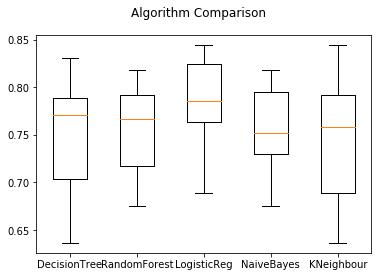

In [55]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

0.7150254668930391


(-0.05, 1.05)

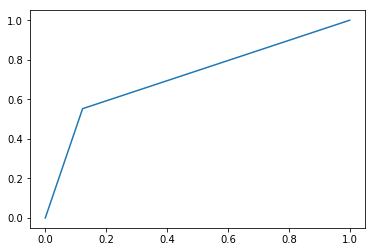

In [62]:
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])